# Самостоятельная работапо теме «Анализ взаимосвязей»
Коптев Данил Сергеевич

**Подключаем библиотеки**

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import math

**Задание 1**

**𝑋** – средний возраст техники
 
**𝑌** – коэффициент сменности техники по предприятию ПМК-7 объединения «Сибкомплектмонтаж»

**Читаем файл**

In [385]:
data1 = pd.read_csv('Коптев 1.csv', sep=';')

**Построим диаграмму рассеивания**

Text(0.5, 1.0, 'Диаграмма рассеивания')

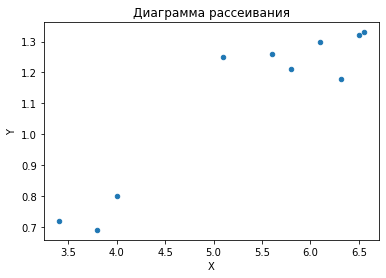

In [386]:
data1.plot.scatter(x='X', y='Y')
plt.title('Диаграмма рассеивания')

Вычислим выборочный коэффициент линейной корреляции Пирсона и проверить его значимость при уровне значимости $𝛼$=0,05 двумя способами фурмалами и с помощью библиотек

**С помощью формул**

**С помощью библиотек**

In [387]:
r,p=sts.pearsonr(data1['X'],data1['Y'])
print(f'r_v={round(r,5)}', f'p-value={round(p,6)}', "a=0.05")

r_v=0.93507 p-value=7.2e-05 a=0.05


Так как значение $p-value$ < $a$ , то можно утверждать, что корреляция **имеется**

**Вывод**

Взаимосвязь между средним возрастом техники и коэффициентом сменности техники по предприятию ПМК-7 объединения «Сибкомплектмонтаж **имеется**, а так же она **сильная** и **положительная**,так как значени корреляции Пирсона выше 0.5 и стремится к 1

**Задание 2**

**Читаем файл**

In [388]:
data2 = pd.read_csv('Коптев 2.csv', sep=';')

**Построим диаграмму рассеивания**

Text(0.5, 1.0, 'Диаграмма рассеивания')

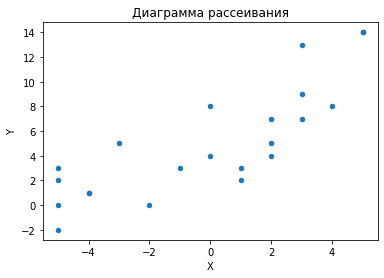

In [389]:
data2.plot.scatter(x = 'X', y = 'Y')
plt.title('Диаграмма рассеивания')

**Вычислим выборочный коэффициент ранговой корреляции Спирмен**

In [390]:
r,p = sts.spearmanr(data2['X'],data2['Y'])
print(f'r_v={round(r,5)}', f'p-value={round(p,6)}', "a=0.05")

r_v=0.84864 p-value=1e-06 a=0.05


Так как значение $p-value$ < $a$ , то можно утверждать, что корреляция **имеется**

**Вычислим выборочный коэффициент ранговой корреляции Кендалла**

In [391]:
r,p = sts.kendalltau(data2['X'],data2['Y'])
print(f'r_v={round(r,5)}', f'p-value={round(p,6)}', "a=0.01")

r_v=0.70809 p-value=1.1e-05 a=0.01


Так как значение $p-value$ < $a$ , то можно утверждать, что корреляция **имеется**

**Вывод**

Взаимосвязь между параметрами имеется, а так же она сильная и положительная, так как значени  корреляции Кендалла и Спирмен выше $0.5$ и стремится к 1

**Задание 3**

**Читаем файл**

In [392]:
data3 = pd.read_csv('Коптев 3.csv', sep=',')
data3

,Вопрос 1,Вопрос 2
0,C,a
1,A,b
2,B,a
3,D,b
4,D,b
...,...,...
70,D,a
71,D,a
72,A,b
73,C,b


**Таблица сопряженности**

In [393]:
crosstab = pd.crosstab(data3['Вопрос 1'], data3['Вопрос 2'], margins = True)
print(crosstab)

Вопрос 2   a   b  All
Вопрос 1             
A          5  14   19
B         17   1   18
C          5  11   16
D         16   6   22
All       43  32   75


Критерий $\chi^2$  считается надежным, только если в таблице сопряженности не слишком много клеток с небольшими частотами (количество клеток с частотами менее 5 не
должно превышать 20%), поэтому мы можем считать, что $\chi^2$ будет надженым, так как значений менее 5 составляет 12,5%

Найдем $\chi^2$ :

In [394]:
obs = np.array(crosstab.iloc[range(crosstab.shape[0]-1), [0, 1]])
exp = np.dot(np.array(crosstab.iloc[range(crosstab.shape[0]-1), [2]]), np.array(crosstab.iloc[[crosstab.shape[0]-1], [0, 1]]))
exp = exp/crosstab.iloc[[crosstab.shape [0]-1], [2]].values[0][0]
print("Наблюдаемые частоты In", obs) 
print("Объем выборки", crosstab.iloc[[crosstab.shape[0]-1], [2]].values[0][0]) 
print("Теоретические частоты In", exp)
ddof =obs.shape[0]+obs.shape[1]-2
print(ddof)
chisquareEC_HS = sts.chisquare(obs, exp, ddof, None)
print(chisquareEC_HS)
print(chisquareEC_HS.pvalue < 0.05)

Наблюдаемые частоты In [[ 5 14]
 [17  1]
 [ 5 11]
 [16  6]]
Объем выборки 75
Теоретические частоты In [[10.89333333  8.10666667]
 [10.32        7.68      ]
 [ 9.17333333  6.82666667]
 [12.61333333  9.38666667]]
4
Power_divergenceResult(statistic=24.18780795350228, pvalue=2.2823232240615985e-05)
True


$p-value$ меньше $0.05$, следовательно существуют основания отвергнуть  гипотезу о независимости признаков

Вычислим  значения  коэффициента  Крамера

In [395]:
def calculateCramers(data):
  global sts, np
  chi2 = sts.chi2_contingency (data, correction= False )[0]
  n = np.sum(data)
  minDim = min(data.shape) - 1
  return np.sqrt((chi2/n) / minDim)

print('Коэффициента  Крамера: ', calculateCramers(np.array(crosstab.iloc[range(crosstab.shape[0]-1), [0, 1]])))

Коэффициента  Крамера:  0.5678944497410562


**Справочная информация**

Взаимосвязь между параметрами имеется, а так же на основание того, что $V$ > $0,30$ можно утверждать, что она существенна 